In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
crim=pd.read_csv("crime_data.csv")

In [3]:
crim

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [5]:
df_norm=norm_func(crim.iloc[:,1:])

In [6]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


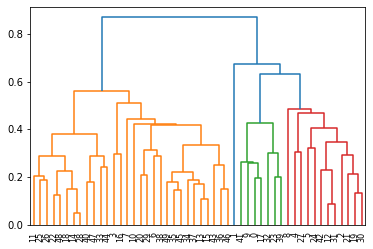

In [8]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [9]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [10]:
y_hc=hc.fit_predict(df_norm)

In [11]:
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [12]:
crim['h_clusterid']=hc.labels_

In [13]:
crim

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


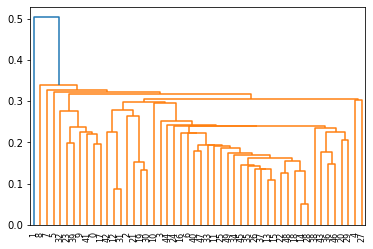

In [14]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='single'))

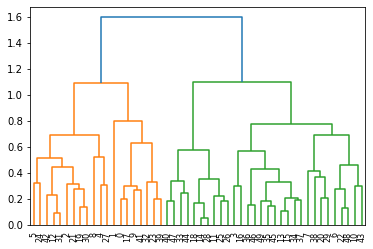

In [15]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

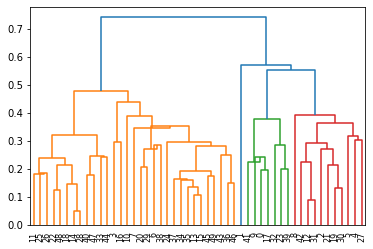

In [16]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='centroid'))

In [17]:
hc1=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')
y_hc1=hc1.fit_predict(df_norm)
y_hc1

array([0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
hc2=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
y_hc2=hc2.fit_predict(df_norm)
y_hc2

array([0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [19]:
crim['h_clusterid_complete']=hc.labels_

In [20]:
crim['h_clusterid_single']=hc1.labels_

In [21]:
crim['h_clusterid_average']=hc2.labels_

In [22]:
crim.drop(['h_clusterid'],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid_complete,h_clusterid_single,h_clusterid_average
0,Alabama,13.2,236,58,21.2,0,0,0
1,Alaska,10.0,263,48,44.5,0,1,2
2,Arizona,8.1,294,80,31.0,0,0,0
3,Arkansas,8.8,190,50,19.5,1,0,1
4,California,9.0,276,91,40.6,0,0,0
5,Colorado,7.9,204,78,38.7,0,0,0
6,Connecticut,3.3,110,77,11.1,1,0,1
7,Delaware,5.9,238,72,15.8,1,0,1
8,Florida,15.4,335,80,31.9,0,2,0
9,Georgia,17.4,211,60,25.8,0,0,0


In [23]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [24]:
crim1=pd.read_csv("crime_data.csv")

In [25]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [26]:
df_norm=norm_func(crim.iloc[:,1:])

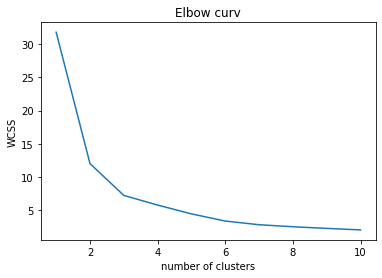

In [27]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

array([0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 3, 0, 1, 3, 1, 1, 0, 3, 0, 1, 0,
       1, 0, 0, 3, 3, 0, 3, 1, 0, 0, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 0, 1,
       3, 1, 1, 3, 1, 1])

In [29]:
x=pd.Series(model.labels_)
crim1['Clust']=x

In [30]:
crim1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [31]:
crim1.iloc[:,1:5].groupby(crim1.Clust).mean()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,12.278947,254.842105,69.473684,28.357895
1,5.715000,132.300000,70.800000,18.100000
2,10.000000,263.000000,48.000000,44.500000
3,3.180000,78.700000,49.300000,11.630000
